In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nelson bay
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | mackenzie
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | batagay
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | stromness
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | toliary
City not found. Skipping...
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | boa vista
Processing Record 20 of Set 1 | turbat
Processing Record 21 of Set 1 | khani
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | tolstoy-yurt
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | guatire
Processing Record 46 of Set 4 | paveh
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | isangel
Processing Record 1 of Set 5 | waipawa
Processing Record 2 of Set 5 | port-gentil
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | lewiston
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | olga
Processing Record 9 of Set 5 | livingston
Processing Record 10 of Set 5 | leh
Processing Record 11 of Set 5 | margate
Processing Record 12 of Set 5 | abha
Processing Record 

Processing Record 27 of Set 8 | jiaozuo
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | navirai
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | afyonkarahisar
Processing Record 32 of Set 8 | pierre
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | dolores
Processing Record 35 of Set 8 | monatele
City not found. Skipping...
Processing Record 36 of Set 8 | boshnyakovo
Processing Record 37 of Set 8 | bangassou
Processing Record 38 of Set 8 | port augusta
Processing Record 39 of Set 8 | new waterford
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | kaseda
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | abay
Processing Record 45 of Set 8 | kaili
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 | carnarvon
Processing Record 48 of Set 8 | alice springs
Processing Record 49 of Set 8 | marawi
Processing Record 50 o

Processing Record 18 of Set 12 | stokmarknes
Processing Record 19 of Set 12 | lokken verk
City not found. Skipping...
Processing Record 20 of Set 12 | beyneu
Processing Record 21 of Set 12 | camacupa
Processing Record 22 of Set 12 | burnie
Processing Record 23 of Set 12 | fez
Processing Record 24 of Set 12 | glens falls
Processing Record 25 of Set 12 | makat
Processing Record 26 of Set 12 | berezayka
Processing Record 27 of Set 12 | sao felix do xingu
Processing Record 28 of Set 12 | charagua
Processing Record 29 of Set 12 | gubkinskiy
Processing Record 30 of Set 12 | huanren
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | sudzha
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | tambovka
Processing Record 35 of Set 12 | okakarara
Processing Record 36 of Set 12 | kedougou
Processing Record 37 of Set 12 | san vicente
Processing Record 38 of Set 12 | fort madison
Processing Record 39 of Set 12 | penzance
Processing Record 40 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nelson Bay,-32.7167,152.1500,59.95,80,46,11.77,AU,2021-07-14 20:48:42
1,Coquimbo,-29.9533,-71.3436,58.73,62,0,10.36,CL,2021-07-14 20:50:56
2,Bluff,-46.6000,168.3333,43.81,65,84,10.38,NZ,2021-07-14 20:51:26
3,Bredasdorp,-34.5322,20.0403,45.72,81,95,3.44,ZA,2021-07-14 20:51:26
4,Mackenzie,55.2999,-123.1698,80.92,24,49,10.56,CA,2021-07-14 20:51:26
5,Torbay,47.6666,-52.7314,74.48,41,5,9.17,CA,2021-07-14 20:47:15
6,Batagay,67.6333,134.6333,48.31,63,92,8.81,RU,2021-07-14 20:47:49
7,Bonthe,7.5264,-12.5050,76.23,87,100,6.87,SL,2021-07-14 20:51:27
8,Cape Town,-33.9258,18.4232,50.41,82,0,5.75,ZA,2021-07-14 20:51:27
9,Tautira,-17.7333,-149.1500,82.42,69,26,19.01,PF,2021-07-14 20:47:36


In [11]:
# Change the column order. 
new_column_order = ["City", "Country", "Date", "Lat","Lng",
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nelson Bay,AU,2021-07-14 20:48:42,-32.7167,152.1500,59.95,80,46,11.77
1,Coquimbo,CL,2021-07-14 20:50:56,-29.9533,-71.3436,58.73,62,0,10.36
2,Bluff,NZ,2021-07-14 20:51:26,-46.6000,168.3333,43.81,65,84,10.38
3,Bredasdorp,ZA,2021-07-14 20:51:26,-34.5322,20.0403,45.72,81,95,3.44
4,Mackenzie,CA,2021-07-14 20:51:26,55.2999,-123.1698,80.92,24,49,10.56
5,Torbay,CA,2021-07-14 20:47:15,47.6666,-52.7314,74.48,41,5,9.17
6,Batagay,RU,2021-07-14 20:47:49,67.6333,134.6333,48.31,63,92,8.81
7,Bonthe,SL,2021-07-14 20:51:27,7.5264,-12.5050,76.23,87,100,6.87
8,Cape Town,ZA,2021-07-14 20:51:27,-33.9258,18.4232,50.41,82,0,5.75
9,Tautira,PF,2021-07-14 20:47:36,-17.7333,-149.1500,82.42,69,26,19.01


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

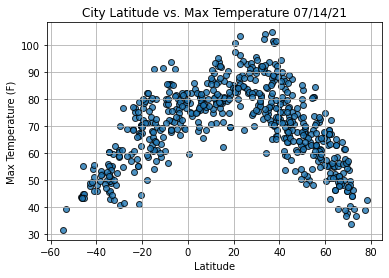

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

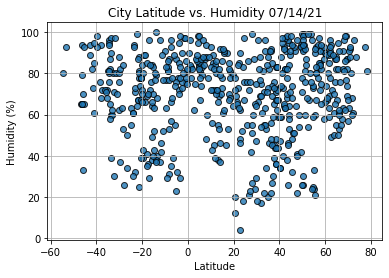

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

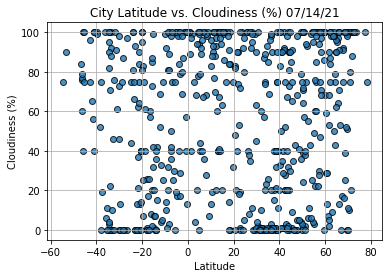

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

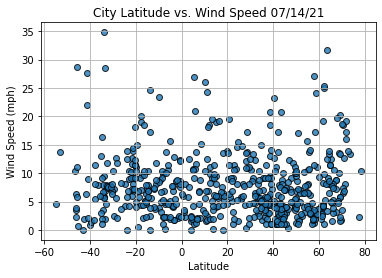

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(10,60))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))